# Model 1

## Arima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ModuleNotFoundError: No module named 'statsmodels'

In [27]:
data = pd.read_csv("/home/student/suahmad/Richter_Final/Main_files/main.csv")

In [28]:
rt = data[['DATE','Returns']]

In [29]:
rt.set_index('DATE', inplace=True)

In [30]:
rt.head() 

,Returns
DATE,
1990-01-01,NaN
1990-01-02,2.119077
1990-01-03,2.088513
1990-01-04,2.078325
1990-01-05,2.061345


In [31]:
rt.tail()

,Returns
DATE,
2021-12-28,53.795998
2021-12-29,53.859951
2021-12-30,53.704628
2021-12-31,54.097504
2022-01-01,NaN


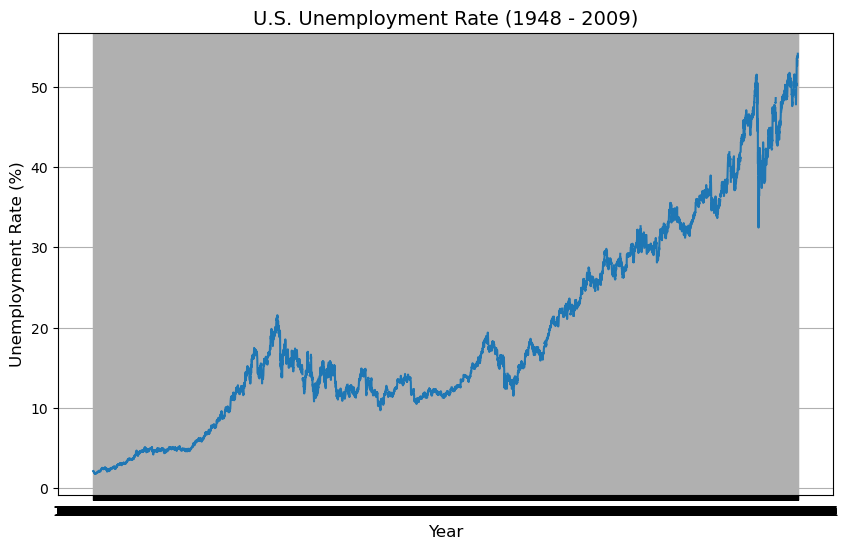

In [14]:
# returns over time
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'])
plt.grid(True)
plt.show()

In [32]:
rates = rt['Returns']

In [33]:
rates = rates.diff().dropna()

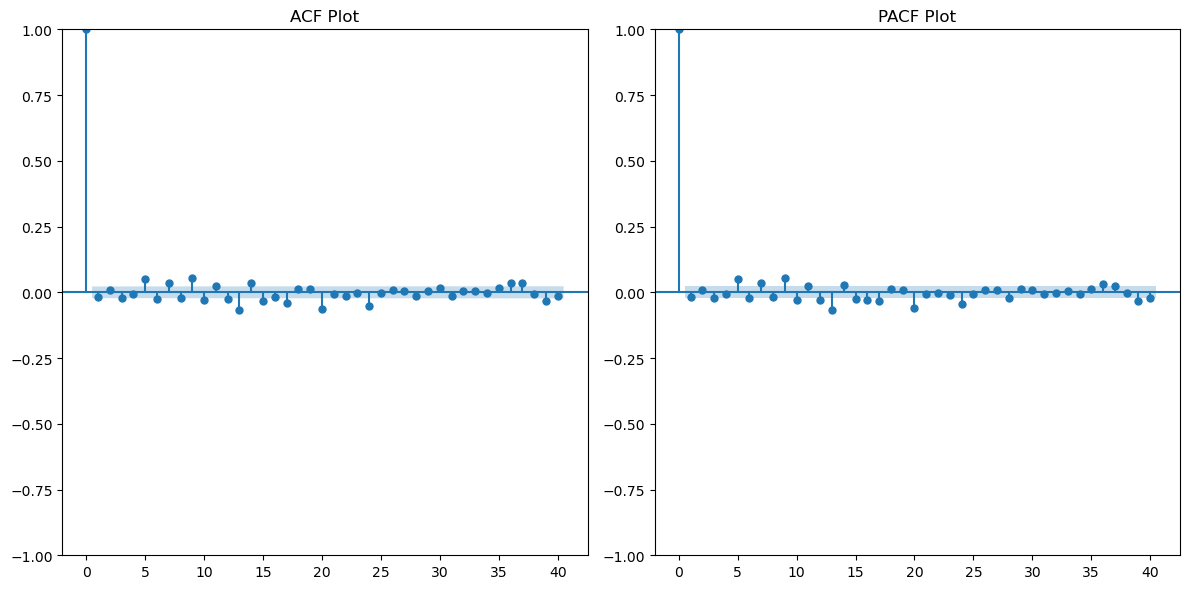

In [34]:
# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(rates, lags=40, ax=plt.gca())
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(rates, lags=40, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()

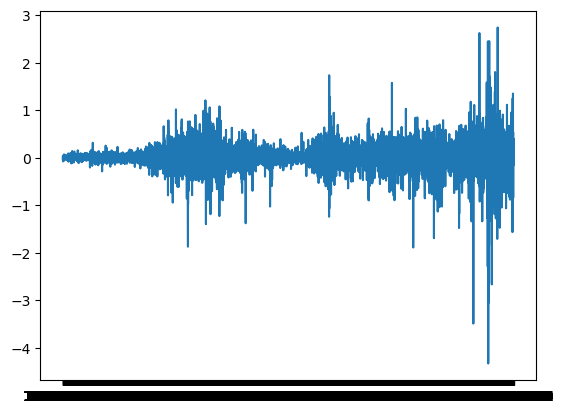

In [19]:
#plt.plot(rates)

In [35]:
arima_model = ARIMA(rates, order=(3, 1, 4)).fit()

# Display model summary
print(arima_model.summary())

/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 7749
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -1205.185
Date:                Fri, 03 Jan 2025   AIC                           2426.370
Time:                        15:26:23   BIC                           2482.012
Sample:                             0   HQIC                          2445.446
                               - 7749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7040      0.033    -51.885      0.000      -1.768      -1.640
ar.L2         -1.5518      0.056    -27.511      0.000      -1.662      -1.441
ar.L3         -0.8057      0.033    -24.453      0.0

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


if isinstance(rates.index, pd.PeriodIndex):
    rates.index = rates.index.to_timestamp()  # Convert PeriodIndex to DatetimeIndex

arima_model = ARIMA(rates, order=(3, 1, 4)).fit()

In [ ]:
forecast_steps = 90
forecast = arima_model.forecast(steps=forecast_steps)

forecast_dates = [rates.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]
forecast.index = forecast_dates

print(forecast)

/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

2022-01-01   -0.007341
2022-01-02    0.061566
2022-01-03   -0.000142
2022-01-04   -0.034495
2022-01-05    0.064284
                ...   
2022-03-27    0.010422
2022-03-28    0.011245
2022-03-29    0.010491
2022-03-30    0.011163
2022-03-31    0.010525
Name: predicted_mean, Length: 90, dtype: float64


/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
arima_model = ARIMA(rates, order=(5, 1, 4)).fit()

# Display model summary
print(arima_model.summary())

/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 7749
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -1199.821
Date:                Thu, 02 Jan 2025   AIC                           2419.642
Time:                        23:34:33   BIC                           2489.194
Sample:                             0   HQIC                          2443.487
                               - 7749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4918      0.043    -34.528      0.000      -1.576      -1.407
ar.L2         -1.3130      0.059    -22.368      0.000      -1.428      -1.198
ar.L3         -0.8320      0.031    -26.631      0.0

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


if isinstance(rates.index, pd.PeriodIndex):
    rates.index = rates.index.to_timestamp()  # Convert PeriodIndex to DatetimeIndex

arima_model = ARIMA(rates, order=(5, 1, 4)).fit()

In [ ]:
forecast_steps = 90
forecast = arima_model.forecast(steps=forecast_steps)

forecast_dates = [rates.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]
forecast.index = forecast_dates

print(forecast)

/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

2022-01-01   -0.029546
2022-01-02    0.048943
2022-01-03    0.022298
2022-01-04   -0.047634
2022-01-05    0.046944
                ...   
2022-03-27    0.007549
2022-03-28    0.010524
2022-03-29    0.007639
2022-03-30    0.010439
2022-03-31    0.007719
Name: predicted_mean, Length: 90, dtype: float64


/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/student/suahmad/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
import yfinance as yf
tickerSymbol = 'KO'

In [24]:
# Get data for the ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for the ticker
stock = tickerData.history(start='2022-01-01', end='2023-01-01')

# Select the 'Close' price column
stock = stock[['Close']]

# Reset the index to convert the date index into a column
stock.reset_index(inplace=True)

# Format the date column to yyyymmdd
stock['Date'] = stock['Date'].dt.strftime('%Y-%m-%d')

# Rename the index from 'Date' to 'DATE'
stock.rename(columns={'Date': 'DATE'}, inplace=True)
stock.rename(columns={'Close': 'Returns'}, inplace=True)

# See the data
stock.head()

,DATE,Returns
0,2022-01-03,54.590664
1,2022-01-04,55.502037
2,2022-01-05,55.962337
3,2022-01-06,55.667751
4,2022-01-07,55.538872
